<a href="https://colab.research.google.com/github/sradhass88/Assignments/blob/main/SRADHA_S_EXIT_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel('/content/dataset.xlsx')


In [146]:
# Displaying the dataset
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [147]:
# droping the column Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

In [148]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [149]:
# checking missing values
df.isnull().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         32536 non-null  float64
 1   Location      32527 non-null  object 
 2   Bedroom       32536 non-null  int64  
 3   Bathroom      32521 non-null  float64
 4   Carport       32521 non-null  float64
 5   Land          32533 non-null  float64
 6   Building      32527 non-null  float64
 7   Month         32527 non-null  float64
 8   City/Regency  32527 non-null  object 
 9   Latitude      32526 non-null  float64
 10  Longitude     32527 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.7+ MB


In [151]:
df.describe()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [152]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

# **Handling missing values**

In [153]:
# For numeric columns- filling the missing values with median

df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Carport'] = df['Carport'].fillna(df['Carport'].median())
df['Land'] = df['Land'].fillna(df['Land'].median())
df['Building'] = df['Building'].fillna(df['Building'].median())
df['Month'] = df['Month'].fillna(df['Month'].median())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())


In [154]:
# For categorical columns-filling the missing values with mode

df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['City/Regency'] = df['City/Regency'].fillna(df['City/Regency'].mode()[0])

# **Exploratory Data Analysis**

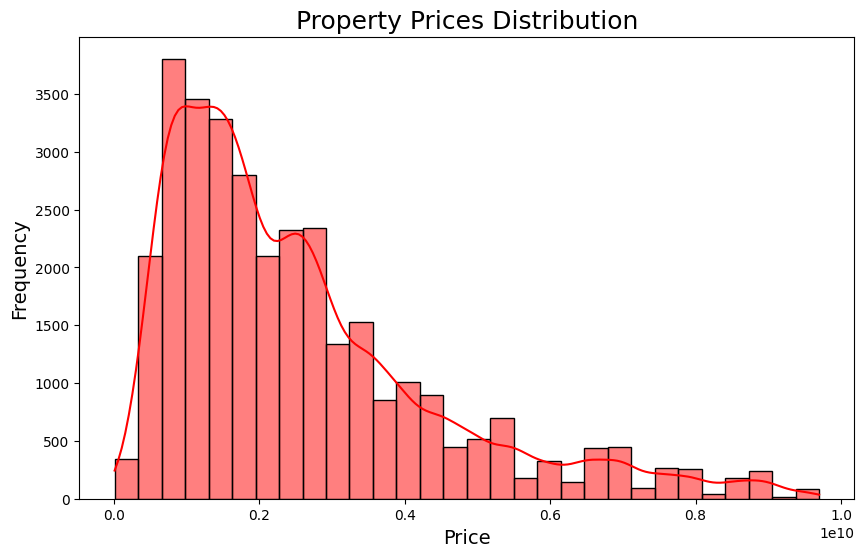

In [155]:
# Property Prices Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True, bins=30, color='Red')
plt.title('Property Prices Distribution', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

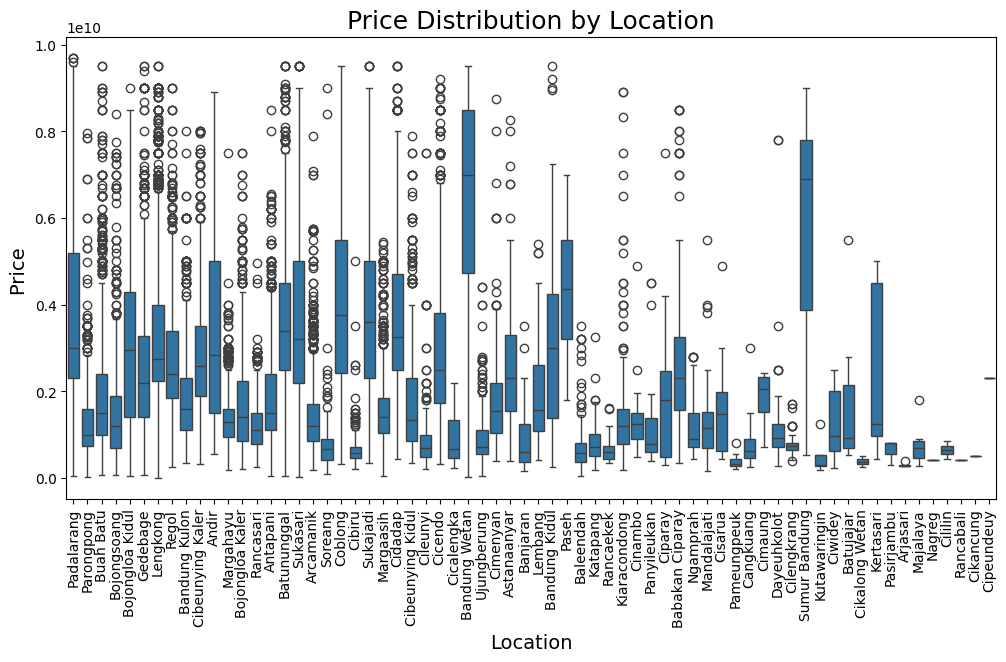

In [156]:
# Boxplot for location wise Price distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='Location', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Location', fontsize=18)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Price ', fontsize=14)
plt.show()


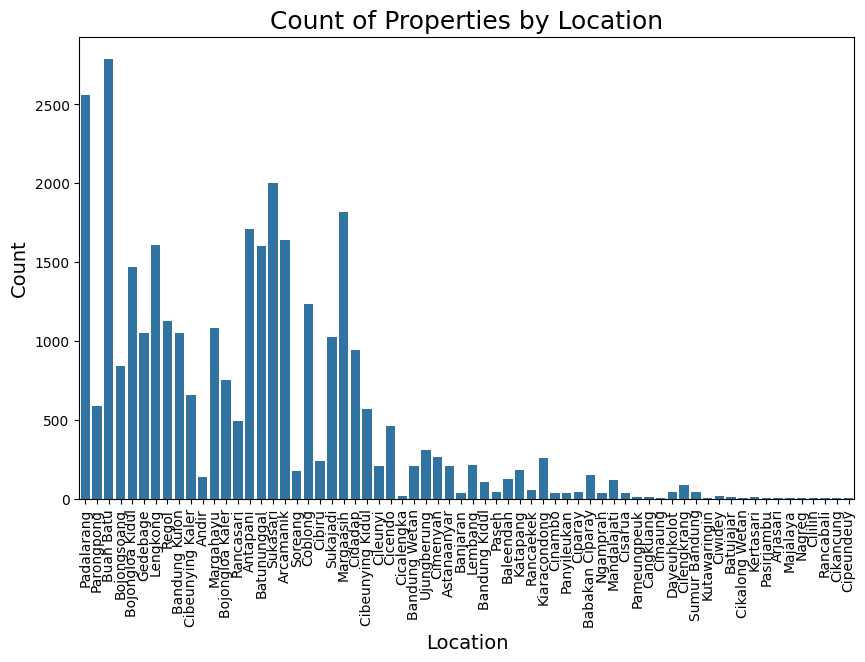

In [157]:
# Countplot of property types
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df)
plt.title('Count of Properties by Location', fontsize=18)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

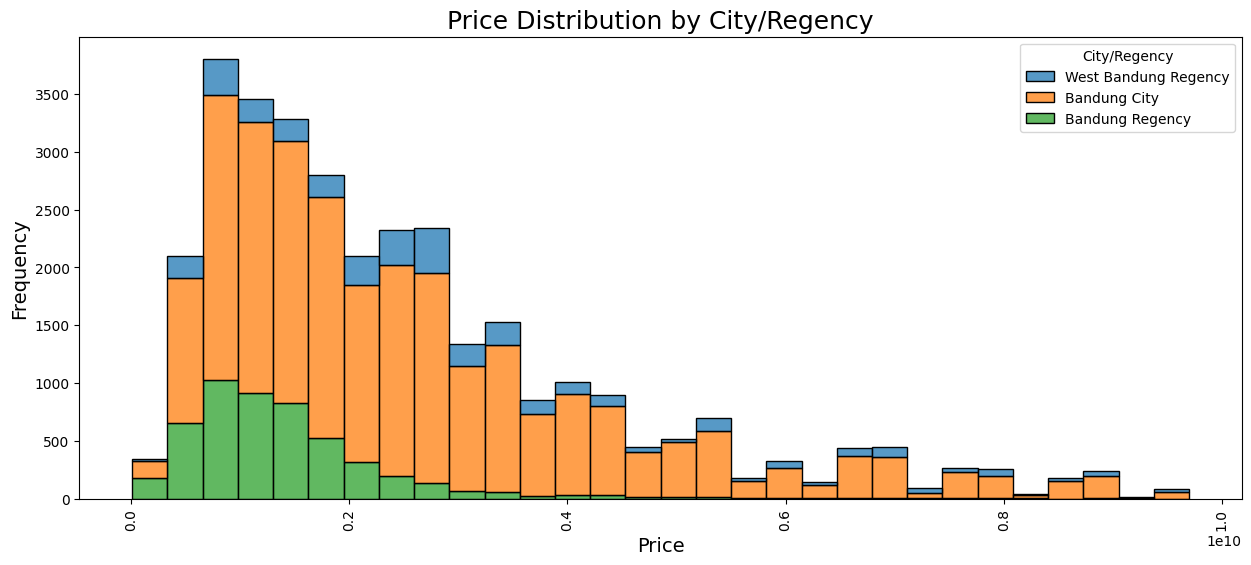

In [158]:
# Price vs City/Regency Histogram
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Price', hue='City/Regency', bins=30, multiple="stack")
plt.title('Price Distribution by City/Regency', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# **Average Property Price by Location**

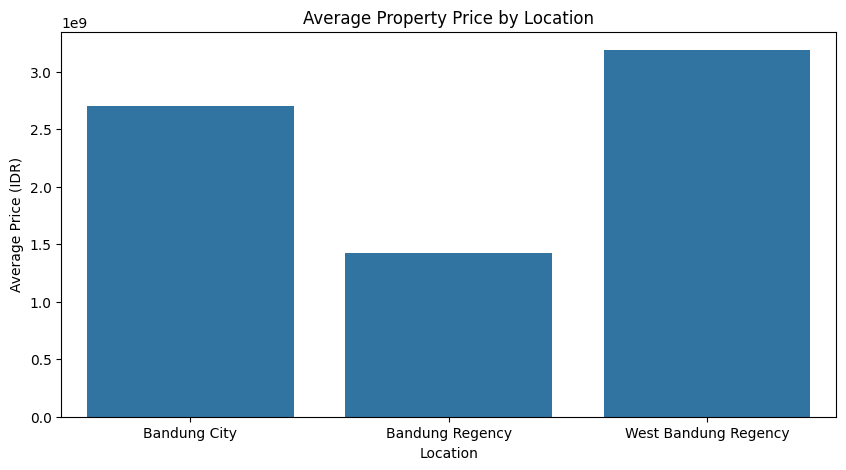

In [159]:
location_avg_price = df.groupby('City/Regency')['Price'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='City/Regency', y='Price', data=location_avg_price)
plt.title('Average Property Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (IDR)')
plt.show()

# **Price vs Numerical Features**

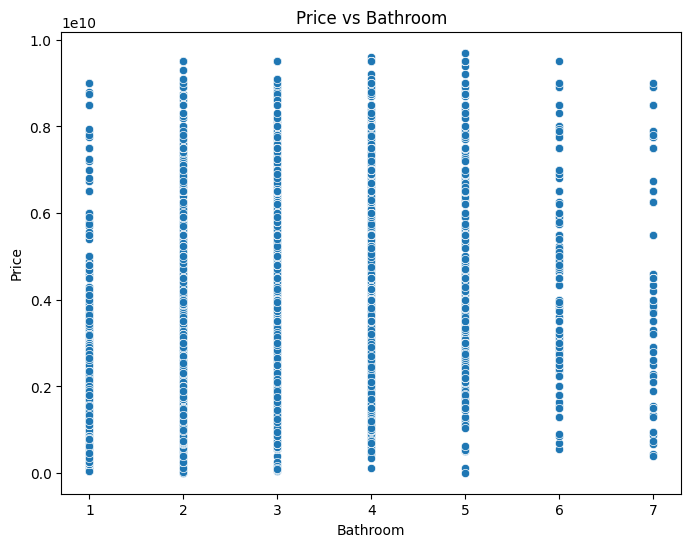

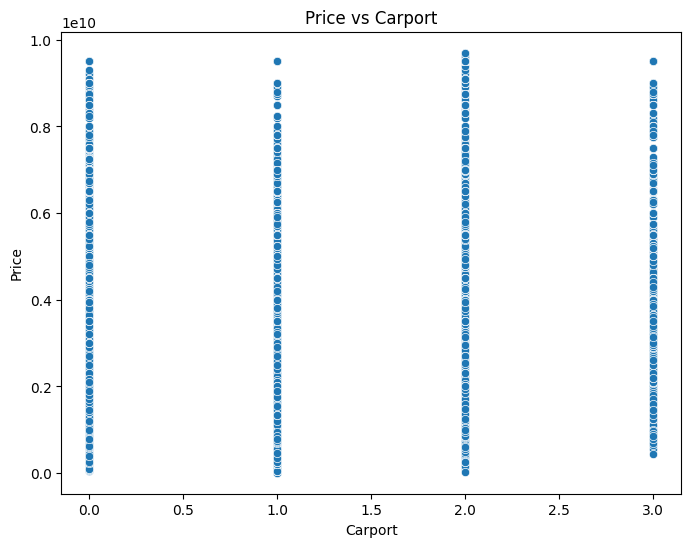

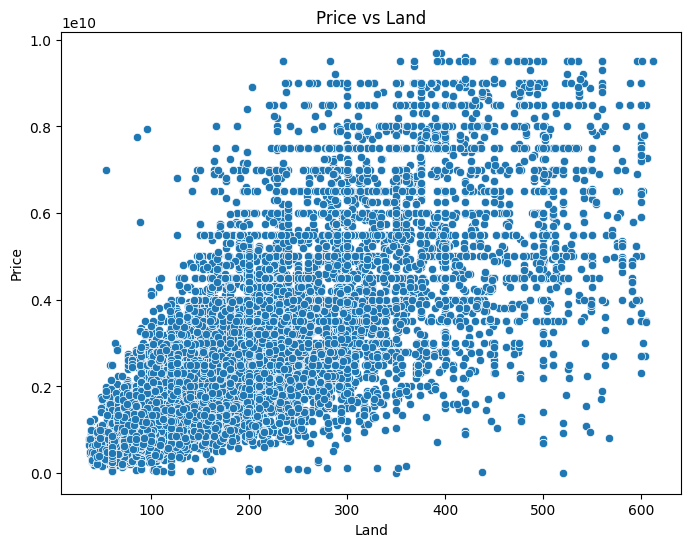

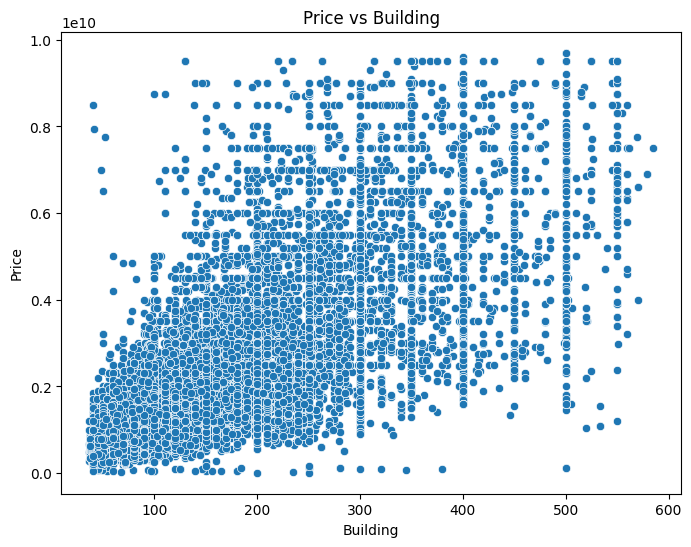

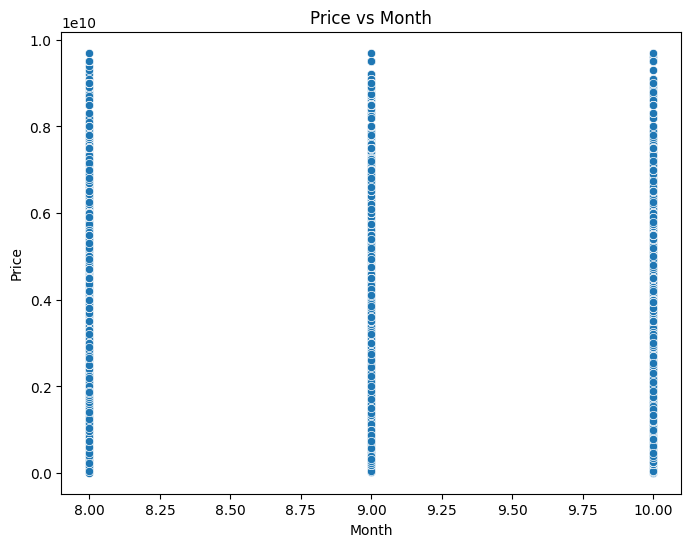

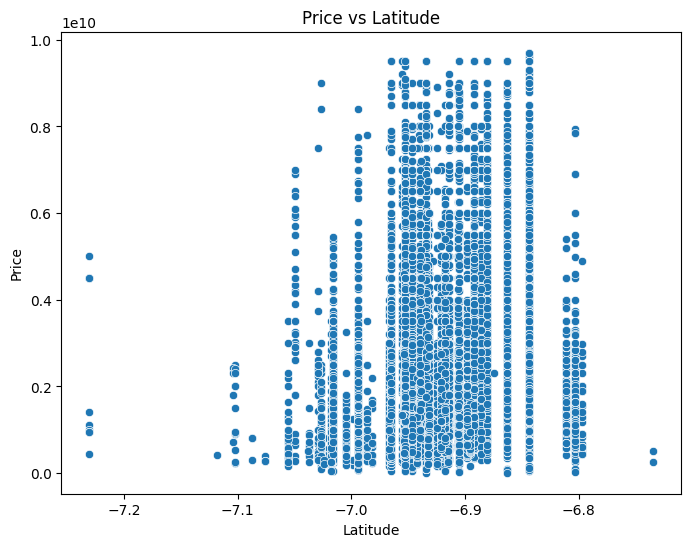

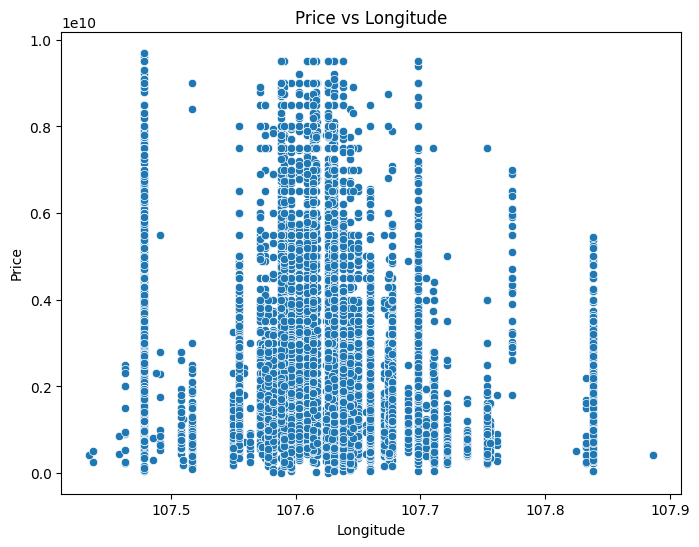

In [160]:
# Price vs All Numerical Features -scatterplot

numerical_features = ['Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']

# Create scatter plots for each numerical feature against price
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=df[feature], y=df['Price'])
  plt.title(f'Price vs {feature}')
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.show()

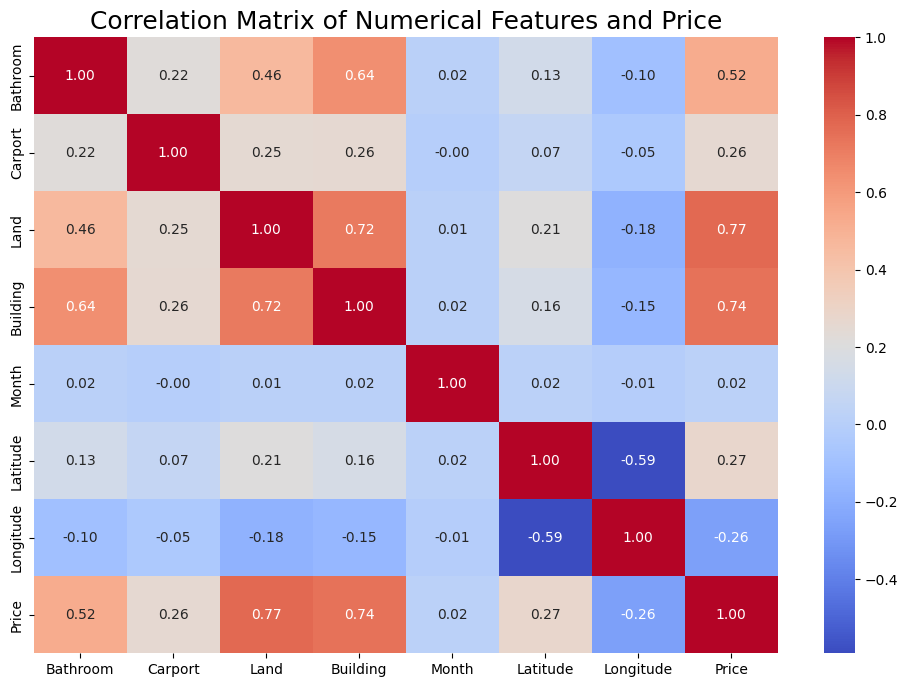

In [161]:
# Correlation Matrix Heatmap
correlation_matrix = df[numerical_features + ['Price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Price', fontsize=18)
plt.show()


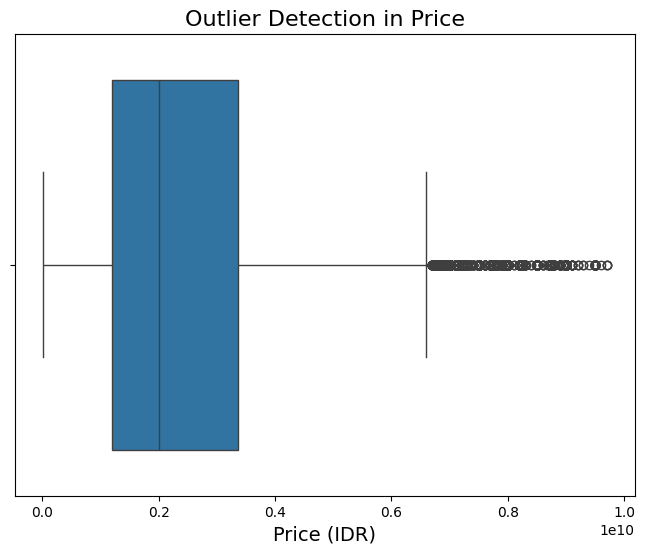

In [162]:
# Detect outliers in the Price column using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price'])
plt.title('Outlier Detection in Price', fontsize=16)
plt.xlabel('Price (IDR)', fontsize=14)
plt.show()


# **FINDING OUTLIERS USING BOXPLOT**

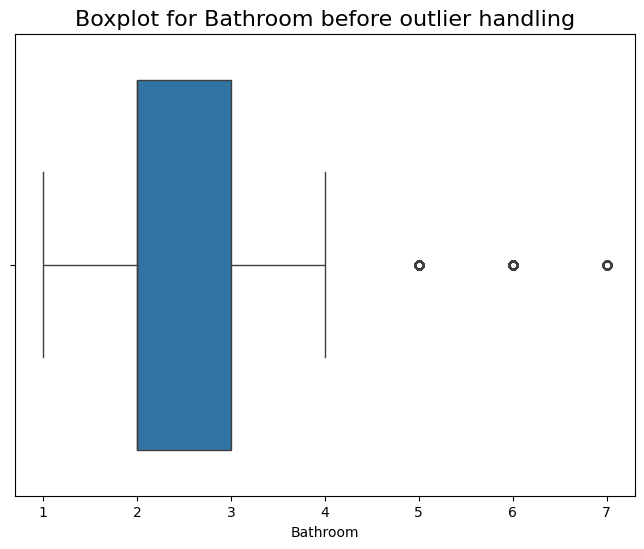

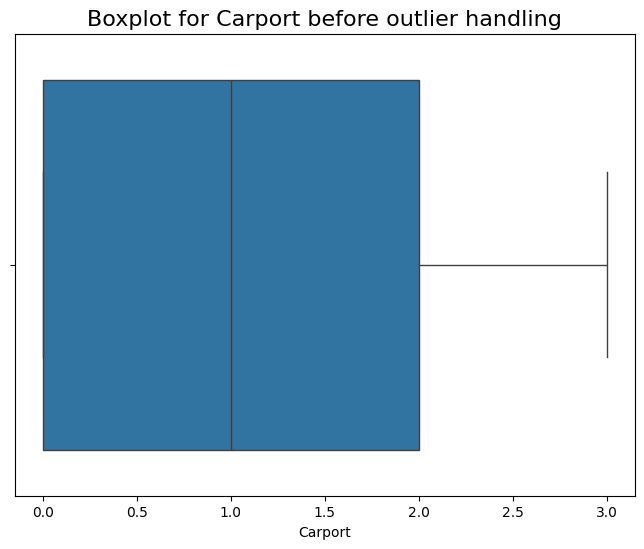

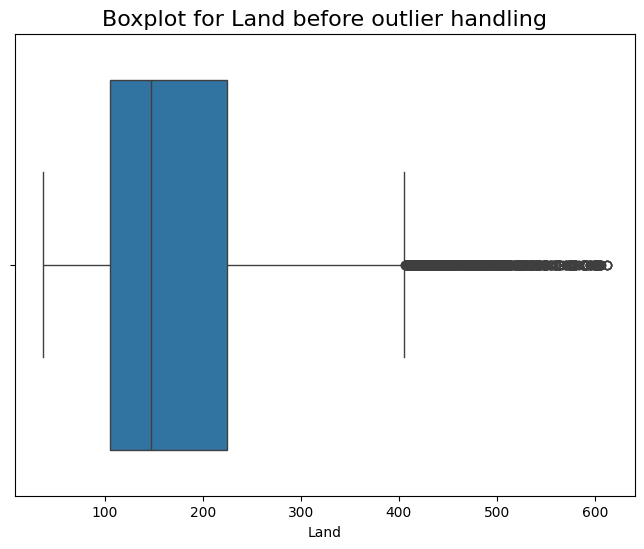

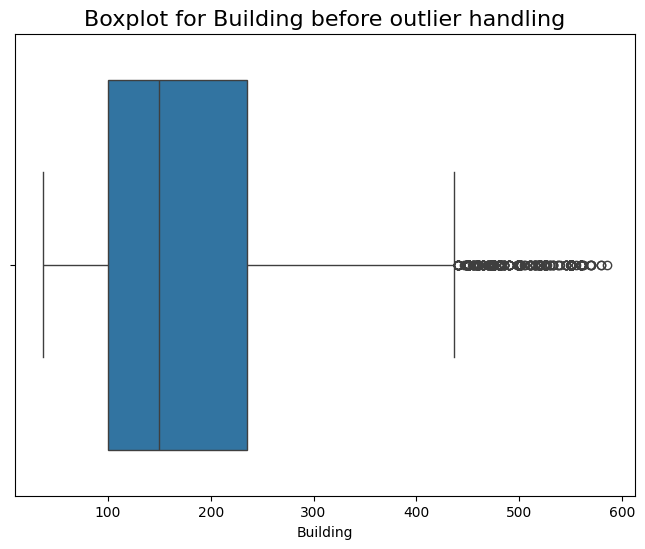

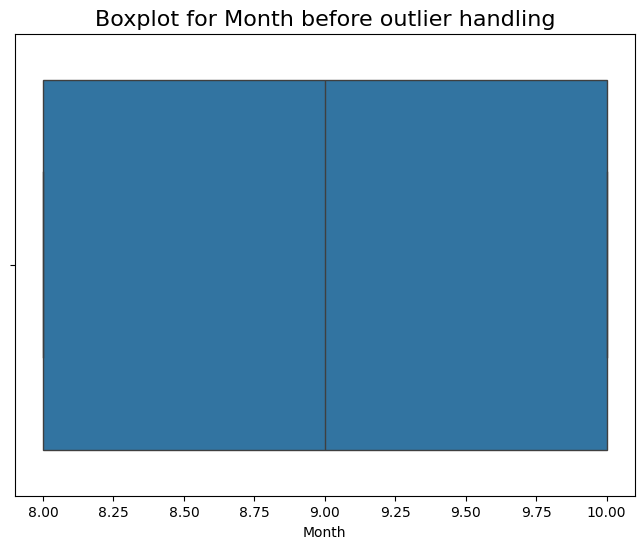

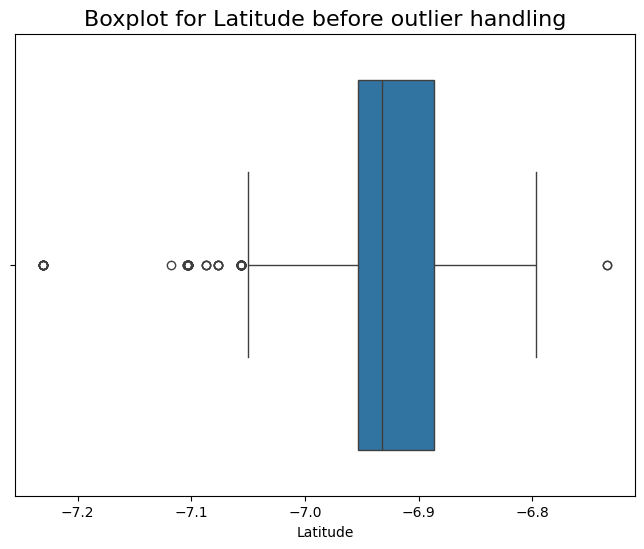

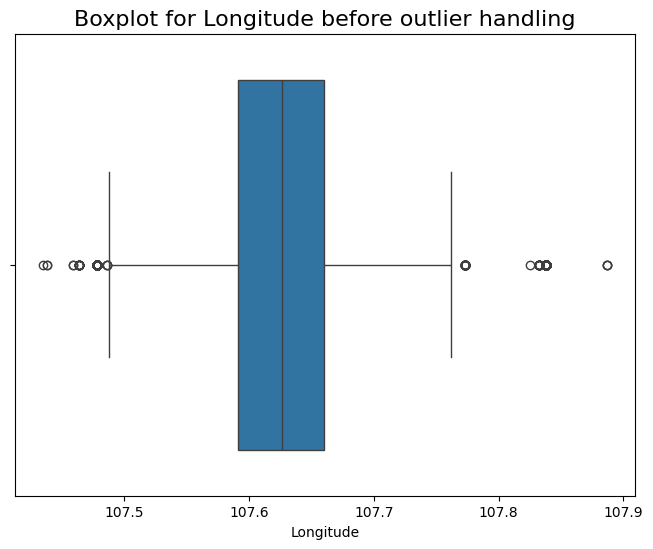

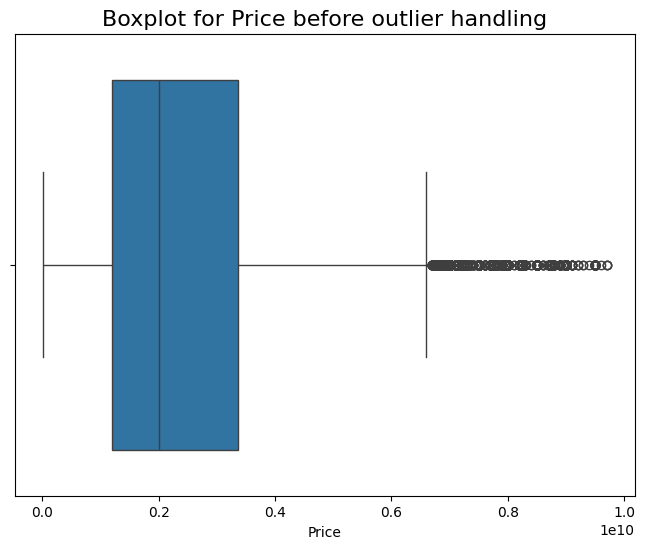

In [163]:
# List of numerical features to check for outliers
numerical_features = ['Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude', 'Price']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature} before outlier handling', fontsize=16)
    plt.show()


# HANDLING OUTLIERS USING IQR METHOD

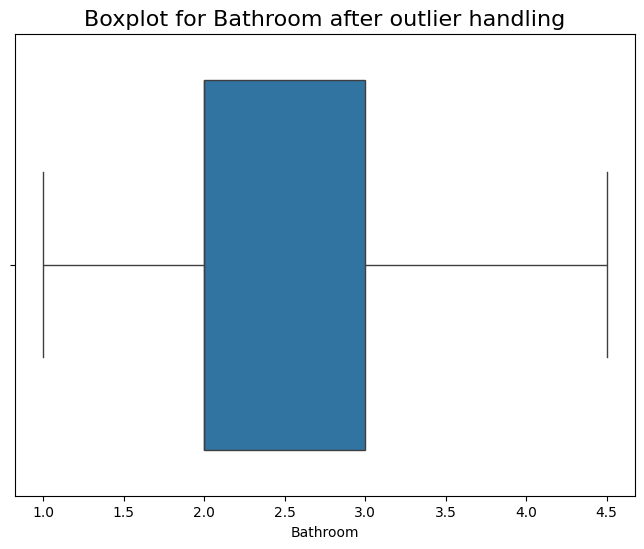

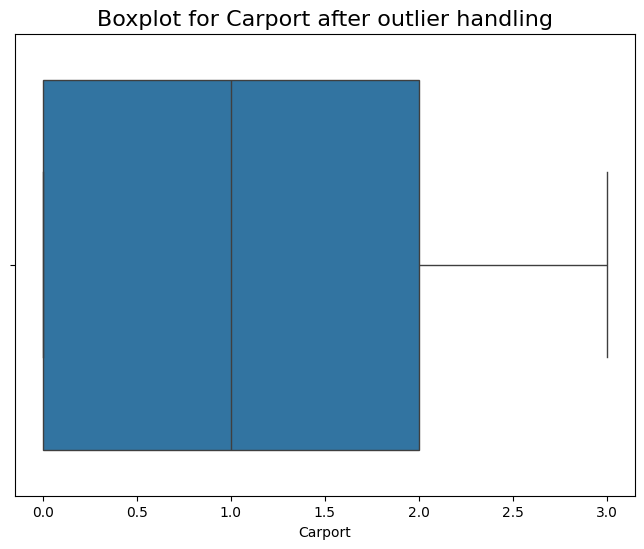

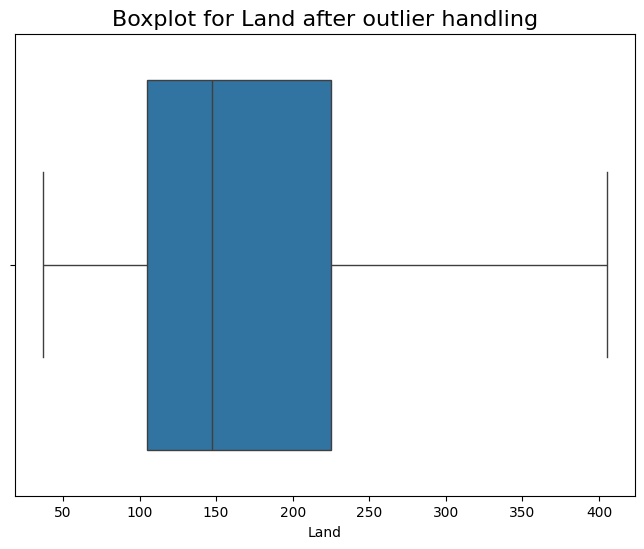

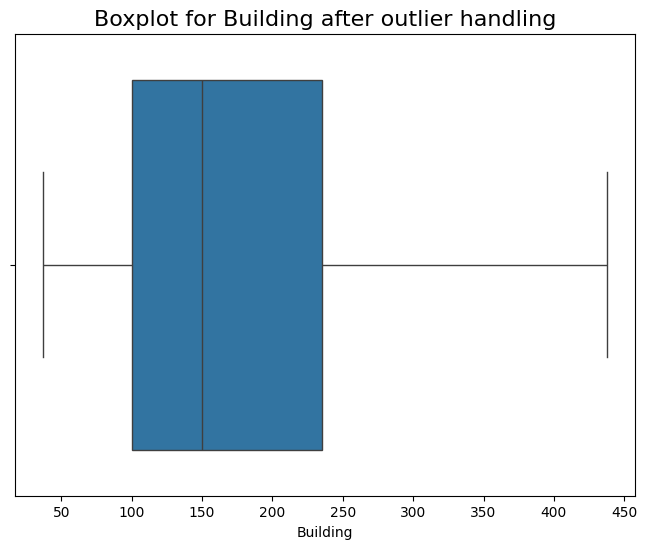

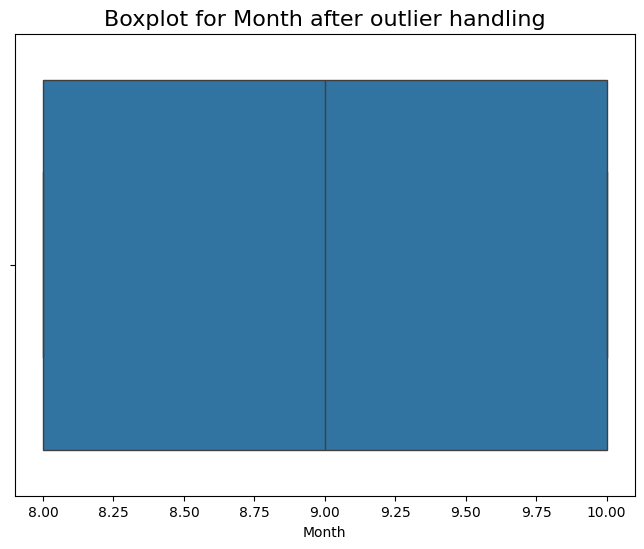

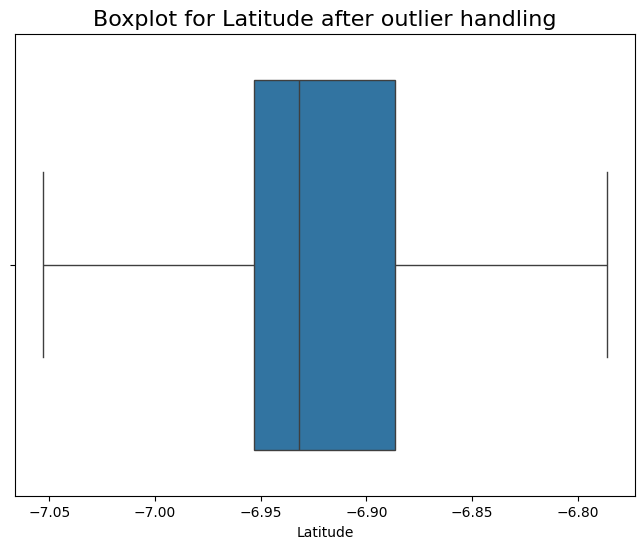

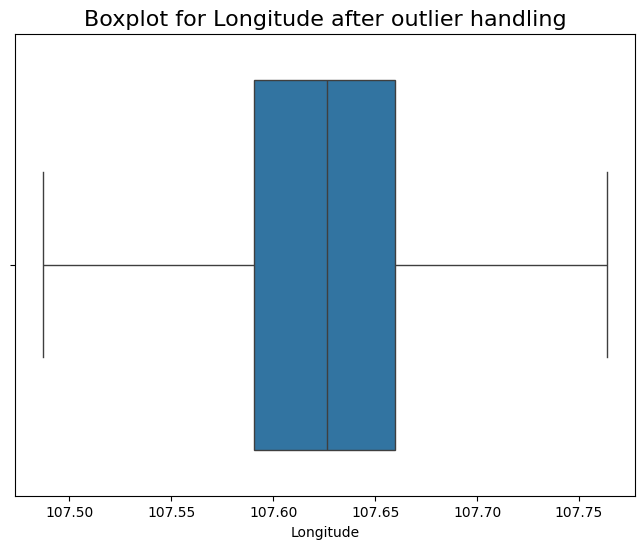

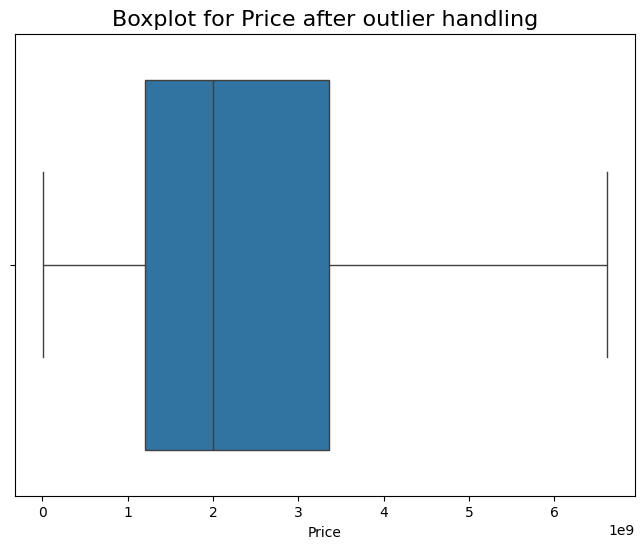

In [164]:
# List of numerical features to check for outliers
numerical_features = ['Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude', 'Price']

for feature in numerical_features:
    # Calculate the IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper or lower bound
    df[feature] = np.where(df[feature] > upper_bound, upper_bound,
                               np.where(df[feature] < lower_bound, lower_bound, df[feature]))

    # Detecting outliers using box plot after handling
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature} after outlier handling', fontsize=16)
    plt.show()

In [165]:
df.describe()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,2.491810e+09,3.524158,2.493914,1.052096,177.423285,177.401340,8.988536,-6.923398,107.622394
std,1.704862e+09,1.235943,0.988924,0.796810,96.521829,102.903354,0.820903,0.050696,0.063560
min,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.052953,107.487046
25%,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,6.612500e+09,8.000000,4.500000,3.000000,405.000000,437.500000,10.000000,-6.786363,107.763582


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         32536 non-null  float64
 1   Location      32536 non-null  object 
 2   Bedroom       32536 non-null  int64  
 3   Bathroom      32536 non-null  float64
 4   Carport       32536 non-null  float64
 5   Land          32536 non-null  float64
 6   Building      32536 non-null  float64
 7   Month         32536 non-null  float64
 8   City/Regency  32536 non-null  object 
 9   Latitude      32536 non-null  float64
 10  Longitude     32536 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.7+ MB


In [167]:
# Print the names of categorical columns
print("Categorical variables:")
for column in df.select_dtypes(include=['object']).columns:
  print(column)

Categorical variables:
Location
City/Regency


In [168]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
location_encoder = LabelEncoder()
city_regency_encoder = LabelEncoder()

# Encode 'Location'
df['Location'] = location_encoder.fit_transform(df['Location'])


# Encode 'City/Regency'
df['City/Regency'] = city_regency_encoder.fit_transform(df['City/Regency'])

In [169]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,51,2,1.0,1.0,72.0,50.0,8.0,2,-6.843600,107.487046
1,8.500000e+08,54,2,1.0,1.0,70.0,80.0,8.0,2,-6.803228,107.581804
2,8.750000e+08,16,3,2.0,1.0,60.0,70.0,8.0,0,-6.965549,107.637926
3,1.750000e+09,15,2,3.0,1.0,90.0,94.0,8.0,1,-6.993945,107.643700
4,4.900000e+09,14,4,4.0,0.0,200.0,300.0,8.0,0,-6.947036,107.596271


In [170]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [171]:
df['Location'].unique()

array([51, 54, 16, 15, 14, 38, 44, 60,  8, 18,  0, 48, 13, 59,  1, 12, 63,
        2, 61, 36, 20, 62, 47, 23, 19, 27, 22, 21,  9, 65, 30,  4, 10, 43,
        7, 55,  6, 39, 58, 41, 31, 53, 32,  5, 50, 46, 34, 52, 17, 29, 37,
       26, 64, 42, 35, 11, 24, 40, 56,  3, 45, 49, 28, 57, 25, 33])

In [172]:
df['City/Regency'].unique()


array([2, 0, 1])

# **SCALING**

In [173]:
# Separate features (X) and target (y)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [174]:
# RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 323721477.3474664
Mean Squared Error (MSE): 3.107731542424601e+17
R-squared (R2): 0.8895284941634121


In [175]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")


Linear Regression:
Mean Absolute Error (MAE): 655852899.9233383
Mean Squared Error (MSE): 7.954291913824387e+17
R-squared (R2): 0.7172462957021023


In [176]:
# LASSO Regression
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # You can adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLASSO Regression:")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")



LASSO Regression:
Mean Absolute Error (MAE): 655852899.907991
Mean Squared Error (MSE): 7.954291913581303e+17
R-squared (R2): 0.7172462957107433


In [177]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5) # You can adjust n_neighbors
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("\nKNN Regression:")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R-squared (R2): {r2_knn}")



KNN Regression:
Mean Absolute Error (MAE): 579776813.1530424
Mean Squared Error (MSE): 7.209345520794715e+17
R-squared (R2): 0.743727138298087


In [178]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Continue with PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train_pca)
X_test = scaler.transform(X_test_pca)

In [179]:
# modeling after PCA
# Create a linear regression model
model_pca = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with PCA-transformed data
model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set with PCA-transformed data
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the model with PCA-transformed data
mae_pca = mean_absolute_error(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"Mean Absolute Error (MAE) with PCA: {mae_pca}")
print(f"Mean Squared Error (MSE) with PCA: {mse_pca}")
print(f"R-squared (R2) with PCA: {r2_pca}")


Mean Absolute Error (MAE) with PCA: 337476767.89288145
Mean Squared Error (MSE) with PCA: 3.69795337520614e+17
R-squared (R2) with PCA: 0.8685476939382621


The analysis demonstrates a strong R-squared value of 0.89, indicating that the predictive model effectively captures the majority of the variance in property prices. While this suggests a solid overall fit, the Mean Absolute Error (MAE) of approximately 323.7 million highlights that individual predictions can still be significantly off, which is crucial for buyers and the real estate company to consider. The high Mean Squared Error (MSE) further emphasizes the presence of potential outliers or unique property characteristics that the model may not fully account for. To enhance predictive accuracy, the real estate company should focus on improving data quality and incorporating additional relevant features, while buyers should approach pricing with caution and conduct thorough research to make informed decisions.